In [1]:
import numpy as np

import matplotlib.pyplot as plt

from timescales.est import fit_acf

## Bias/Error in Tau is Related to Number of Lags

This notebook examines the effect of the number of lags (i.e. lag length) on tau estimation error. The results here show that the number of lags should be as close to the length of the timescale as possible to minimize bias.

This notebook also provides a greatly simplied simulation procedure that doesn't require convolution or a Poisson distribution.

### Number of Lags == Length of Timescale

Tau estimates are accurate when the number of lags is equal to the length of the timscale.

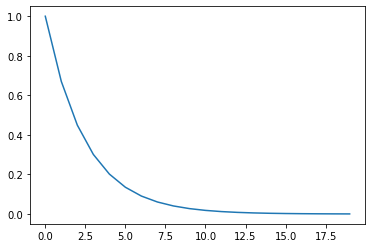

In [2]:
# Simulate a "kernel", but rather than convolving, probabilities are directly
# drawn from an exponential decay distribution
tau = 2.5
t = np.arange(20)
exp = np.exp(-t/tau)
plt.plot(exp)

In [3]:
n_neurons = 100

probs = np.zeros(10000)
spikes = np.zeros((n_neurons, 10000), dtype=bool)

niters = 100
nlags = 20

_corrs = np.zeros((niters, nlags))
_taus = np.zeros((niters))

ind = 0
while ind < len(probs)-len(exp):
    probs[ind:ind+len(exp)] = exp
    ind += np.random.randint(20, 1000)

for n in range(niters):
        
    for i in range(n_neurons):
        spikes[i] = (probs > np.random.rand(*probs.shape))

    corrs, params = fit_acf(spikes.sum(axis=0), nlags)
    _corrs[n] = corrs
    _taus[n] = params[1]

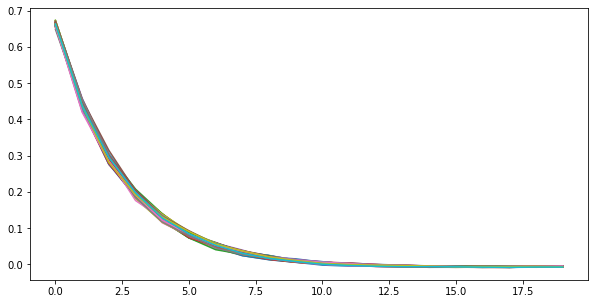

In [4]:
plt.figure(figsize=(10, 5))

for c in _corrs:
    plt.plot(c)

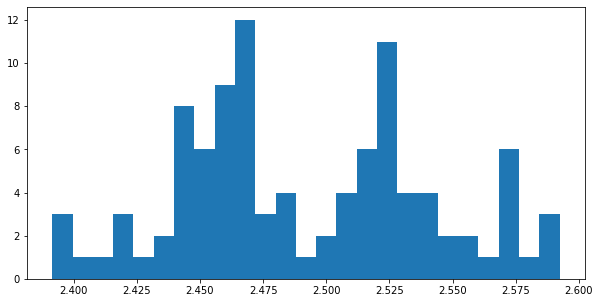

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(_taus, bins=25);

### Number of Lags >> Length of Timescale

The number of lags here is much greater than the simulated timescale, resulting in a larger degree of error/bias in estimation of tau.

In [6]:
n_neurons = 100

probs = np.zeros(10000)
spikes = np.zeros((n_neurons, 10000), dtype=bool)

niters = 100
nlags = 200

_corrs = np.zeros((niters, nlags))
_taus = np.zeros((niters))

ind = 0
while ind < len(probs)-len(exp):
    probs[ind:ind+len(exp)] = exp
    ind += np.random.randint(20, 1000)

for n in range(niters):
        
    for i in range(n_neurons):
        spikes[i] = (probs > np.random.rand(*probs.shape))

    corrs, params = fit_acf(spikes.sum(axis=0), nlags)
    _corrs[n] = corrs
    _taus[n] = params[1]

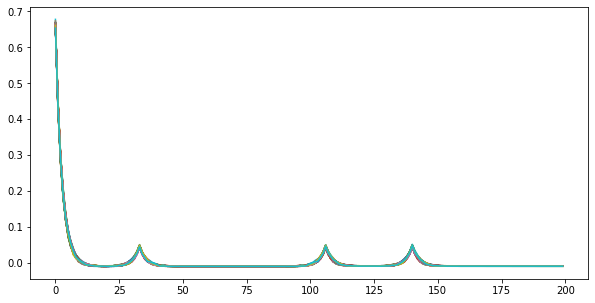

In [7]:
plt.figure(figsize=(10, 5))

for c in _corrs:
    plt.plot(c)

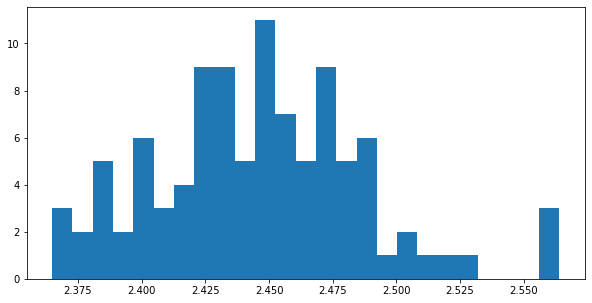

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(_taus, bins=25);